<div align="center">
  <h1>Homework 4</h1>
    <p>
        <div align="center">
        <h2>Yutong Dai yutongd3@illinois.edu</h2>
        </div>
    </p>
</div>

## 3.6
a) According to the graph below, the optimal value for the objective function is $-\frac{11}{3}$, which is attained at $(\frac{1}{3},\frac{4}{3})$.

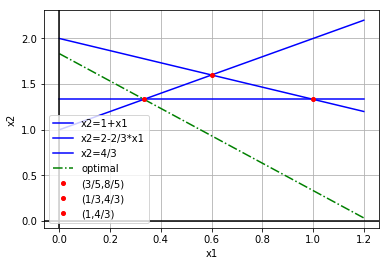

In [42]:
x = np.linspace(0,1.2,100)
fig, ax = plt.subplots()
ax.plot(x, 1 + x, 'b-', markersize=2, label="x2=1+x1")
ax.plot(x, 2-(2/3)*x, 'b-', markersize=2, label="x2=2-2/3*x1")
ax.plot(x, np.zeros_like(x)+4/3, 'b-', markersize=2, label="x2=4/3")
ax.plot(x, -(3/2)*x - (1/2) * (-11/3), "g-.", label="optimal")
plt.plot(3/5,8/5,'ro',markersize=4, label='(3/5,8/5)')
plt.plot(1/3,4/3,'ro',markersize=4, label='(1/3,4/3)')
plt.plot(1,4/3,'ro',markersize=4, label='(1,4/3)')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

b)

Rewrite the problem in the standard form,

$$
\begin{align}
& \max \quad -3x_1  - 2x_2\\
& s.t \quad -x_1 + x_2 + x_3 = 1\\
& \qquad 2x_1 + 3x_2 + x_4 = 6\\
& \qquad x_3 -x_5 = \frac{4}{3} \\
& \qquad x_1,...,x_5\geq 0
\end{align}
$$

Then we partition the matrix $A$ as

$$
A=
\begin{bmatrix}
-1 & 1 & 1 & || & 0 & 0 \\
2  & 3 & 0 & || & 1 & 0\\
0  & 1 & 0 & || & 0 & -1
\end{bmatrix},
$$

So $B=
\begin{bmatrix}
-1 & 1 & 1 \\
2  & 3 & 0 \\
0  & 1 & 0 \\
\end{bmatrix}$, 
$N=
\begin{bmatrix}
 0 & 0 \\
 1 & 0\\
 0 & -1
\end{bmatrix}$, $C_B^T=(-3,-2,0)$, $C_N^T=(0,0)$, $b^T=(1,6,4/3)$.

So the **basic feasible solution** is $x_0^T=B^{-1}b=(1, 4/3, 2/3)$.
And the tableau form is given below.

|   | $z$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | RHS |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $z$ | -1 | 0 | 0 | 0 |1.5  | 2.5 |  17/3|
| $x_1$| 0| 1 | 0 | 0 |  0.5  | 1.5 |  1|
| $x_2$| 0| 0 | 1 | 0 |   0 | -1 | 4/3 |
| $x_3$| 0| 0 | 0 | 1 |  0.5  | 2.5 |  2/3|


In [70]:
B = np.array([[-1,1,1],[2,3,0],[0,1,0]])
N = np.array([[0,0],[1,0],[0,-1]])
CB = np.array([[-3],[-2],[0]])
CN = np.array([[0],[0]])
b = np.array([[1],[6],[4/3]])
print("Current Cost:{}".format(np.dot(CB.T,np.linalg.inv(B).dot(b))))
print("Current BFS:{}".format(np.linalg.inv(B).dot(b).T))
print("Cost Reduction:{}".format(CN.T-np.dot(CB.T,np.linalg.inv(B)).dot(N)))
print("B.inv * N:\n{}".format(np.linalg.inv(B).dot(N)))

Current Cost:[[-5.66666667]]
Current BFS:[[1.         1.33333333 0.66666667]]
Cost Reduction:[[1.5 2.5]]
B.inv * N:
[[ 0.5  1.5]
 [ 0.  -1. ]
 [ 0.5  2.5]]


c) Choose $x_4$ as the pivot column.
$\delta=\min\{1/0.5, (2/3)/(0.5)\}=4/3$, then the tableau becomes to

|   | $z$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | RHS |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $z$ | -1 | 0 | 0 | -3 |0  | -5 |  11/3|
| $x_1$| 0| 1 | 0 | -1 |  0  | -1 |  1/3|
| $x_2$| 0| 0 | 1 | 0 |   0 | -1 | 4/3 |
| $x_4$| 0| 0 | 0 | 2 |  1  | 5 |  4/3|

So the current solution is $(1/3, 4/3, 0, 4/3, 0)$ and the base matrix is
$B=
\begin{bmatrix}
-1 & 1 &  0  \\
2  & 3 & 1 \\
0  & 1 &  0 
\end{bmatrix}$

Since all the cost is negative, the solution is optimal for the maximization problem.

d)

ii) As $x_2\geq 4/3$, we know that the second column of $A$ has to be in bases. So there are in total all four combinations.

$$
B_1 =
\begin{bmatrix}
-1 & 1 & 1\\
2  & 3 & 0 \\
0  & 1 & 0 
\end{bmatrix},
B_2 =
\begin{bmatrix}
-1 & 1 &  0  \\
2  & 3 &  1 \\
0  & 1 &  0 
\end{bmatrix},
B_3=
\begin{bmatrix}
-1 & 1 & 0 \\
2  & 3 & 0\\
0  & 1 & -1
\end{bmatrix},
$$
